![Pandas Logo](https://www.seekpng.com/png/detail/70-701902_pandas-logo-pandas-python-logo.png)

# <span style="color:blue">Session 06 - Introduction to Pandas </span>

## <span style="color:red">Today's Agenda </span>
- Pandas: Introduction
    - Series
    - DataFrames
    - Indexing, Selecting, Filtering
    - Drop columns
    - Handling missing Data
    

In [1]:
# Importing modules
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context("notebook")
import matplotlib

# Series
A _Series_ is a one-dimensional array-like object containing an array of data and an associated array of __data labels__.
One can use any NumPy data type to assign to the _Series_

Creating a Series:

In [2]:
np.random.seed(1)

x=np.random.random(26)

In [3]:
series_1 = pd.Series(x)
series_1

0     0.417022
1     0.720324
2     0.000114
3     0.302333
4     0.146756
5     0.092339
6     0.186260
7     0.345561
8     0.396767
9     0.538817
10    0.419195
11    0.685220
12    0.204452
13    0.878117
14    0.027388
15    0.670468
16    0.417305
17    0.558690
18    0.140387
19    0.198101
20    0.800745
21    0.968262
22    0.313424
23    0.692323
24    0.876389
25    0.894607
dtype: float64

One can get a NumPy array from the Series, by typing:

In [4]:
series_1.values

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
       3.96767474e-01, 5.38816734e-01, 4.19194514e-01, 6.85219500e-01,
       2.04452250e-01, 8.78117436e-01, 2.73875932e-02, 6.70467510e-01,
       4.17304802e-01, 5.58689828e-01, 1.40386939e-01, 1.98101489e-01,
       8.00744569e-01, 9.68261576e-01, 3.13424178e-01, 6.92322616e-01,
       8.76389152e-01, 8.94606664e-01])

# Reindexing

One can also get the indices of each element, by typing:

In [5]:
series_1.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

One can also have a custom set of indices:

In [6]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
alphabet

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [7]:
random_values = np.random.random(len(alphabet))
series_2 = pd.Series(random_values, index=alphabet)
series_2

a    0.085044
b    0.039055
c    0.169830
d    0.878143
e    0.098347
f    0.421108
g    0.957890
h    0.533165
i    0.691877
j    0.315516
k    0.686501
l    0.834626
m    0.018288
n    0.750144
o    0.988861
p    0.748166
q    0.280444
r    0.789279
s    0.103226
t    0.447894
u    0.908596
v    0.293614
w    0.287775
x    0.130029
y    0.019367
z    0.678836
dtype: float64

One can also select a subsample of the _Series_ by index or column name

In [8]:
series_1[[0, 1, 2]]

0    0.417022
1    0.720324
2    0.000114
dtype: float64

In [9]:
series_1[[1,9,24]]

1     0.720324
9     0.538817
24    0.876389
dtype: float64

In [17]:
series_2[['d','a','x']]

d    0.053363
a    0.211628
x    0.165354
dtype: float64

# Arithmetic and function Mapping

You can also perform numerical operations on Series objects like numpy arrays

In [10]:
series_1**2

0     1.739074e-01
1     5.188674e-01
2     1.308160e-08
3     9.140498e-02
4     2.153729e-02
5     8.526416e-03
6     3.469287e-02
7     1.194122e-01
8     1.574244e-01
9     2.903235e-01
10    1.757240e-01
11    4.695258e-01
12    4.180072e-02
13    7.710902e-01
14    7.500803e-04
15    4.495267e-01
16    1.741433e-01
17    3.121343e-01
18    1.970849e-02
19    3.924420e-02
20    6.411919e-01
21    9.375305e-01
22    9.823472e-02
23    4.793106e-01
24    7.680579e-01
25    8.003211e-01
dtype: float64

In [11]:
series_1[1]**2

0.5188673758527017

Or filter to find values greater than some value '__x__'

In [12]:
x = 0.5
series_1[(series_1 >= x) & (series_1 < 0.8)]

1     0.720324
9     0.538817
11    0.685220
15    0.670468
17    0.558690
23    0.692323
dtype: float64

You can apply functions to a column, and save it as a _new_ Series

In [13]:
import sys
def exponentials(arr, basis=10.):
    """
    Uses the array `arr` as the exponents for `basis`
    
    Parameters
    ----------
    arr: numpy array, list, pandas Series; shape (N,)
        array to be used as exponents of `basis`
    
    power: int or float, optional (default = 10)
        number used as the basis
    
    Returns
    -------
    exp_arr: numpy array or list, shape (N,)
        array of values for `basis`**`arr`
    """
    if isinstance(arr, list):
        exp_arr = [basis**x for x in arr]
        return exp_arr        
    elif isinstance(arr, np.ndarray) or isinstance(arr, pd.core.series.Series):
        exp_arr = basis**arr
        return exp_arr
    else:
        cmd = ">>>> `arr` is not a list nor a numpy array"
        cmd +="\n>>>> Please give the correct type of object"
        print(cmd)
        sys.exit(1)

In [14]:
exponentials(series_1[(series_1 >= x) & (series_1 > 0.6)]).values

array([5.25199729, 4.84417139, 7.55296438, 4.68238921, 6.32040006,
       9.29526072, 4.92405183, 7.52296692, 7.84524776])

You can also __create__ a _Series_ using a _dictionary_ (we talked about these on __Session 4__)

In [17]:
labels_arr = ['foo', 'bar', 'baz']
data_arr   = [100, 200, 300]
dict_1     = dict(zip(labels_arr, data_arr))

In [18]:
series_3 = pd.Series(dict_1)
series_3

foo    100
bar    200
baz    300
dtype: int64

# Handling Missing Data

One of the most useful features of pandas is that it __can handle missing data__ quite easily:

In [19]:
index = ['foo', 'bar', 'baz', 'qux']
#qux has no data
series_4 = pd.Series(dict_1, index=index)
series_4

foo    100.0
bar    200.0
baz    300.0
qux      NaN
dtype: float64

In [20]:
pd.isnull(series_4)

foo    False
bar    False
baz    False
qux     True
dtype: bool

we can also add series together

In [22]:
series_3 + series_4

bar    400.0
baz    600.0
foo    200.0
qux      NaN
dtype: float64

So using a Series is powerful, but __DataFrames__ are probably what gets used the most since it represents a _tabular data structure_ containing an ordered collection of __columns__ and __rows__.

# DataFrames

A DataFrame is a "tabular data structure" containing an _ordered collection of columns_. Each column can a have a __different__ data type.

Row and column operations are treated roughly symmetrically.
One can obtain a DataFrame from a normal dictionary, or by reading a file with columns and rows.

Creating a DataFrame

In [23]:
data_1 = {'state' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'popu' : [5.0, 5.1, 5.2, 4.0, 4.1]}
df_1 = pd.DataFrame(data_1)
df_1

,state,year,popu
0,VA,2012,5.0
1,VA,2013,5.1
2,VA,2014,5.2
3,MD,2014,4.0
4,MD,2015,4.1


This DataFrame has 4 rows and 3 columns by the name "_popu_", "_state_", and "_year_".

The way to __access__ a DataFrame is quite similar to that of accessing a _Series_.<br>
To access a __column__, one writes the name of the `column`, as in the following example:

In [24]:
df_1['popu']

0    5.0
1    5.1
2    5.2
3    4.0
4    4.1
Name: popu, dtype: float64

One can also handle __missing data__ with DataFrames.
Like Series, columns that are not present in the data are NaNs:

In [26]:
df_2 = pd.DataFrame(data_1, columns=['year', 'state', 'popu', 'unempl'])
df_2

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,NaN
3,2014,MD,4.0,NaN
4,2015,MD,4.1,NaN


One can __retrieve a row__ by index like so:

In [30]:
df_2.iloc[1:4]

,year,state,popu,unempl
1,2013,VA,5.1,NaN
2,2014,VA,5.2,NaN
3,2014,MD,4.0,NaN


Editing a DataFrame is quite easy to do. One can _assign_ a Series to a column of the DataFrame. If the Series is a list or an array, __the length must match the DataFrame__.

In [31]:
unempl = pd.Series([1.0, 2.0, 10.], index=[1,3,5])
unempl

1     1.0
3     2.0
5    10.0
dtype: float64

In [32]:
df_2['unempl'] = unempl
df_2

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,1.0
2,2014,VA,5.2,NaN
3,2014,MD,4.0,2.0
4,2015,MD,4.1,NaN


In [33]:
df_2.unempl.isnull()

0     True
1    False
2     True
3    False
4     True
Name: unempl, dtype: bool

You can also __transpose__ a DataFrame, i.e. switch rows by columns, and columns by rows

In [34]:
df_2.T

,0,1,2,3,4
year,2012,2013,2014,2014,2015
state,VA,VA,VA,MD,MD
popu,5.0,5.1,5.2,4.0,4.1
unempl,NaN,1.0,NaN,2.0,NaN


Now, let's say you want to show __only the 'year' and 'popu' columns__.
You can do it by:

In [35]:
df_2

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,1.0
2,2014,VA,5.2,NaN
3,2014,MD,4.0,2.0
4,2015,MD,4.1,NaN


In [36]:
df_2[['year', 'unempl']]

,year,unempl
0,2012,NaN
1,2013,1.0
2,2014,NaN
3,2014,2.0
4,2015,NaN


# Dropping Entries

Let's say you only need a subsample of the table that you have, and you need to __drop__ a column from the DataFrame.
You can do that by using the '_drop_' option:

In [37]:
df_2

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,1.0
2,2014,VA,5.2,NaN
3,2014,MD,4.0,2.0
4,2015,MD,4.1,NaN


In [38]:
df_3 = df_2.drop('unempl', axis=1)
df_3

df_2.drop('unempl', axis=1)

,year,state,popu
0,2012,VA,5.0
1,2013,VA,5.1
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


In [39]:
df_2

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,1.0
2,2014,VA,5.2,NaN
3,2014,MD,4.0,2.0
4,2015,MD,4.1,NaN


You can also __drop certain rows__:

In [40]:
df_4 = df_2.drop([1,2])
df_4

,year,state,popu,unempl
0,2012,VA,5.0,NaN
3,2014,MD,4.0,2.0
4,2015,MD,4.1,NaN


__Look at this carefully__! The DataFrame _preserved_ the same indices as for __df_2__.

If you can to __reset__ the indices, you can do that by:

In [41]:
df_4.reset_index(inplace=True)
df_4

,index,year,state,popu,unempl
0,0,2012,VA,5.0,NaN
1,3,2014,MD,4.0,2.0
2,4,2015,MD,4.1,NaN


# Gaia Dataset 
![Gaia](https://www.cosmos.esa.int/documents/29201/0/Gaia_logo.png/62960d22-cdd9-02a2-c9d0-1bda19ab67cf?t=1607347628590)

Pandas is great at reading Data tables and CSV files, and other kinds of documents.
For the remainder of this notebook, we will be using the [Gaia](https://www.cosmos.esa.int/web/gaia)'s DR1 catalogue.

In [42]:
# Path to online file
url_path = 'http://cdn.gea.esac.esa.int/Gaia/gdr2/gaia_source/csv/GaiaSource_1000172165251650944_1000424567594791808.csv.gz'

# Converting data to DataFrame
gaia_df = pd.read_csv(url_path, compression='gzip')

In [44]:
## Let's look at the first few rows of the dataframe we read in

In [45]:
gaia_df.head(3)

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper
0,1635721458409799680,Gaia DR2 1000225938242805248,1000225938242805248,1197051105,2015.5,103.447529,0.041099,56.022025,0.045175,0.582790,...,0.0595,0.008,0.1351,200111.0,1.024730,1.017359,1.038814,1.075774,0.801798,1.349751
1,1635721458409799680,Gaia DR2 1000383512003001728,1000383512003001728,598525552,2015.5,105.187856,0.016978,56.267982,0.016904,1.385686,...,0.2430,0.083,0.4030,200111.0,1.388711,1.311143,1.453106,1.937890,1.852440,2.023341
2,1635721458409799680,Gaia DR2 1000274106300491264,1000274106300491264,299262776,2015.5,103.424758,0.464608,56.450903,0.582490,0.314035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Shape, Columns and Rows

You can get the shape of the "gaia_df" DataFrame by typing: 

In [46]:
gaia_df.shape

(14209, 94)

That means there are __14209 rows__ and __94 columns__.

To get an array of the columns available, one could write:

In [48]:
gaia_df.columns.values.sort()
gaia_df.columns.values

array(['a_g_percentile_lower', 'a_g_percentile_upper', 'a_g_val',
       'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_gof_al',
       'astrometric_matched_observations', 'astrometric_n_bad_obs_al',
       'astrometric_n_good_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_obs_al', 'astrometric_params_solved',
       'astrometric_primary_flag', 'astrometric_pseudo_colour',
       'astrometric_pseudo_colour_error', 'astrometric_sigma5d_max',
       'astrometric_weight_al', 'b', 'bp_g', 'bp_rp', 'dec', 'dec_error',
       'dec_parallax_corr', 'dec_pmdec_corr', 'dec_pmra_corr',
       'designation', 'duplicated_source', 'e_bp_min_rp_percentile_lower',
       'e_bp_min_rp_percentile_upper', 'e_bp_min_rp_val', 'ecl_lat',
       'ecl_lon', 'flame_flags', 'frame_rotator_object_type', 'g_rp', 'l',
       'lum_percentile_lower', 'lum_percentile_upper', 'lum_val',
       'matched_observations', 'mean_varpi_factor_al', 'parallax',
  

Let's say you only want a DataFrame with the the columns:
- ra (right ascension)
- dec (declination)
- l (galactic longitude)
- b (galactic latitude)

You do this by using the __loc__ option for the DataFrame:

In [49]:
gaia_df_2 = gaia_df.loc[:,['ra','dec','l','b']]

# Displaying the first 15 lines
gaia_df_2.head(15)

,ra,dec,l,b
0,103.447529,56.022025,160.163475,22.533932
1,105.187856,56.267982,160.174346,23.534087
2,103.424758,56.450903,159.712110,22.635989
3,105.049751,56.508777,159.899324,23.518554
4,103.352525,56.395144,159.758838,22.582657
5,101.929791,55.973333,159.959619,21.705035
6,101.853926,56.129320,159.785705,21.709303
7,105.128850,56.285081,160.147553,23.506483
8,103.396330,56.714410,159.432230,22.690559
9,101.780437,55.945333,159.962507,21.616907


You can produce __plots__ directly from the DataFrame

<AxesSubplot:title={'center':'Right Ascension and Declination for Gaia'}, xlabel='ra', ylabel='dec'>

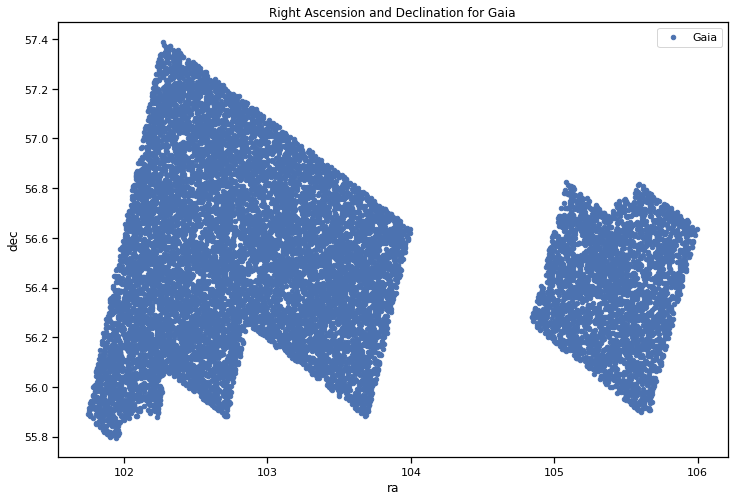

In [54]:
title_txt = 'Right Ascension and Declination for Gaia'

gaia_df_2.plot('ra','dec',       # Columns to plot
               kind='scatter',   # Kind of plot. In this case, it's `scatter`
               label='Gaia',     # Label of the points
               title=title_txt,  # Title of the figure
               color='#4c72b0',  # Color of the points
               figsize=(12,8))  # Size of the fiure

Or even __Scatterplot Matrices__:

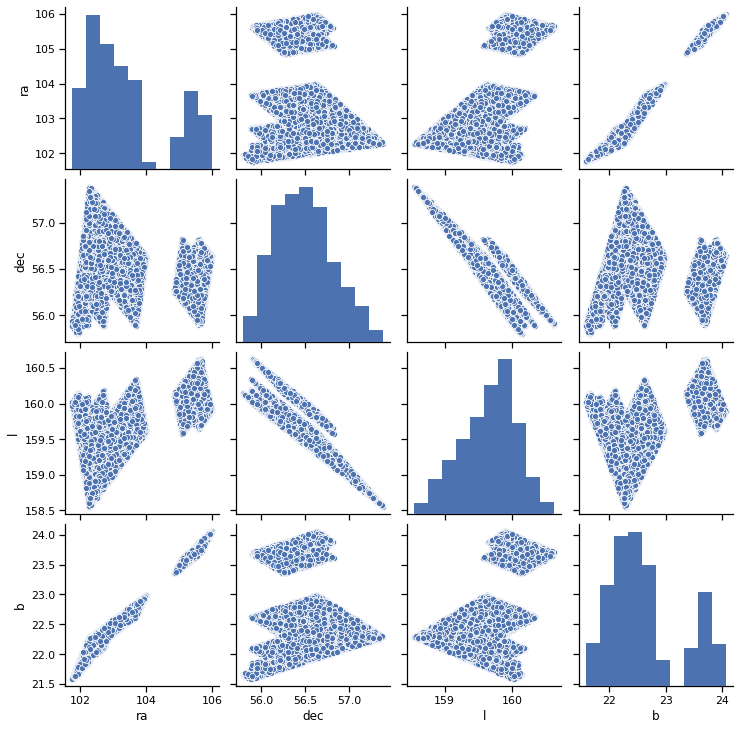

In [55]:
sns.pairplot(gaia_df_2, plot_kws={'color': '#4c72b0'}, diag_kws={'color': '#4c72b0'})

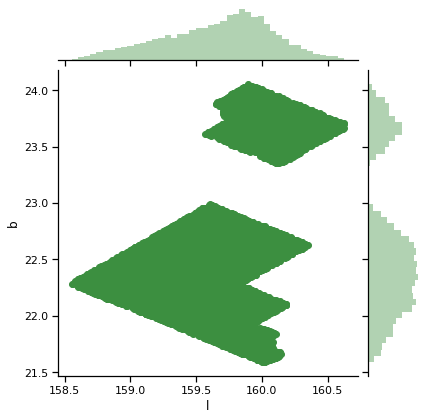

In [56]:
sns.jointplot(gaia_df_2['l'], gaia_df_2['b'], color='#3c8f40')

# Indexing, Selecting, Filtering Data

Now I want to filter the data based on __ra__ and __dec__:

I want to select all the stars within:
- 45 < RA < 50
- 5 < Dec < 10

Normally, you would could do in numpy using the __`np.where`__ function, like in the following example:

In [63]:
ra_arr = gaia_df_2.ra.values
dec_arr = gaia_df_2.dec.values

In [64]:
# Just showing the first 25 elements
np.column_stack((ra_arr, dec_arr))[0:25]

array([[103.44752895,  56.02202543],
       [105.18785594,  56.2679821 ],
       [103.42475813,  56.45090293],
       [105.04975071,  56.50877738],
       [103.35252488,  56.39514381],
       [101.92979073,  55.97333308],
       [101.85392576,  56.12931976],
       [105.12884963,  56.28508092],
       [103.39632957,  56.7144103 ],
       [101.78043734,  55.94533326],
       [103.50036565,  56.84462941],
       [105.64948082,  56.63252739],
       [103.18961712,  56.81515376],
       [103.53014423,  55.98817459],
       [105.93886175,  56.58868695],
       [102.24453393,  56.64103702],
       [102.02432422,  56.0158414 ],
       [103.0848673 ,  56.25264172],
       [102.30172541,  56.6658301 ],
       [103.28806439,  56.2536194 ],
       [103.05853189,  56.72134178],
       [102.0578448 ,  56.39003547],
       [103.71357369,  56.62167297],
       [103.37050966,  56.11391562],
       [103.44554963,  56.29543043]])

In [65]:
## Numpy way of finding the stars that meet the criteria

ra_min, ra_max = (102, 104)
dec_min, dec_max = (56.4, 56.7)

# RA critera
ra_idx = np.where((ra_arr >= ra_min) & (ra_arr <= ra_max))[0]

# Dec criteria
dec_idx = np.where((dec_arr >= dec_min) & (dec_arr <= dec_max))[0]

# Finding `intersecting' indices that meet both criteria
radec_idx = np.intersect1d(ra_idx, dec_idx)

# Selecting the values from only those indices
ra_new = ra_arr[radec_idx]
dec_new = dec_arr[radec_idx]

# Printing out ra and dec for corresponding indices
print(np.column_stack((ra_new, dec_new)))

[[103.42475813  56.45090293]
 [102.24453393  56.64103702]
 [102.30172541  56.6658301 ]
 ...
 [103.81978156  56.62006303]
 [103.31712396  56.61945699]
 [103.57468884  56.4318757 ]]


This is rather convoluted and __long__, and one can easily make a mistake if s/he doesn't keep track of which arrays s/he is using!

In Pandas, this is __much easier!!__

In [66]:
gaia_df_3 = gaia_df_2.loc[(
                (gaia_df_2.ra >= ra_min) & (gaia_df_2.ra <= ra_max) &
                (gaia_df_2.dec >= dec_min) & (gaia_df_2.dec <= dec_max))]
gaia_df_3[['ra','dec']]

,ra,dec
2,103.424758,56.450903
15,102.244534,56.641037
18,102.301725,56.665830
22,103.713574,56.621673
32,103.462653,56.532017
...,...,...
14195,102.307805,56.625449
14200,103.733646,56.568726
14201,103.819782,56.620063
14204,103.317124,56.619457


# <span style="color:red">Future of Pandas </span>
Pandas is a __great__ for handling data, especially comma-delimited or space-separated data. Pandas is also compatible with many other packages, like __seaborn__, __astropy__, NumPy, etc.

We will have another lecture on Pandas that will cover much more advanced aspects of Pandas. __Make sure you keep checking the schedule!__

# <span style="color:blue">Resources </span>
- [12 Useful Pandas Techniques in Python for Data Manipulation](https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)
- [Datacamp Pandas Tutorial](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)
- [Top 8 resources for learning data analysis with pandas](http://www.dataschool.io/best-python-pandas-resources/)